# COVID-19 population penetration

#### Hypothesis

H0: More than 50% of Indian populaiton will contact COVID-19.

H1: People will get vaccination before COVID-19 infects 50% of Indian Population.

We will study COVID-19 data w.r.t to below two broad categories and then we will specifically look into parameters 
which when combined can come up with spread rate of COVID-19.

Categories:

1- National
  
2- Global

Sub-Categories:

a) Confirmed cases
b) Confirmed recoveries
c) Confirmed Fatalties
d) Confirmed Vaccinated

Once we analyse the above categories w.r.t to sub-categories we will move ahead by converting the data spread into PDF which will give us a timeline of the spread.

We will also try to visualise any kind of pattern found during our analysis.

In [1]:
import json
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
#import geoplot as gplt
#import geopandas as gpd
#import geoplot.crs as gcrs
#import imageio
#import pathlib
#import mapclassify as mc
from joypy import joyplot
from pandas.api.types import CategoricalDtype
%matplotlib inline

### Reading Covid-19 Data

#### INDIA

In [2]:
dsi_ts = pd.read_csv('https://api.covid19india.org/csv/latest/case_time_series.csv') # case time series
dsi_sw =  pd.read_csv('https://api.covid19india.org/csv/latest/state_wise.csv') # state wise time series
dsi_dw =  pd.read_csv('https://api.covid19india.org/csv/latest/district_wise.csv') # district wise time series
dsi_swd =  pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv') # state wise daily
dsi_vsw =  pd.read_csv('http://api.covid19india.org/csv/latest/vaccine_doses_statewise.csv') # vaccine state wise
#dsi_sw =  pd.read_csv('http://api.covid19india.org/csv/latest/cowin_vaccine_data_statewise.csv')
#dsi_sw =  pd.read_csv('http://api.covid19india.org/csv/latest/cowin_vaccine_data_districtwise.csv')

In [3]:
# understanding data
print('dsi_ts keys {}, dsi_sw keys {}, dsi_dw keys {}, dsi_swd keys {}, dsi_vsw keys {} '.format(dsi_ts.keys(), 
                                                                                          dsi_sw.keys(),
                                                                                         dsi_dw.keys(),
                                                                                         dsi_swd.keys(),
                                                                                         dsi_vsw.keys()))
# printing dataframe information 
print('dsi_ts info {}, dsi_sw info {}, dsi_dw info {}, dsi_swd info {}, dsi_vsw info {} '.format(dsi_ts.info(), 
                                                                                          dsi_sw.info(),
                                                                                         dsi_dw.info(),
                                                                                         dsi_swd.info(),
                                                                                         dsi_vsw.info()))

dsi_ts keys Index(['Date', 'Date_YMD', 'Daily Confirmed', 'Total Confirmed',
       'Daily Recovered', 'Total Recovered', 'Daily Deceased',
       'Total Deceased'],
      dtype='object'), dsi_sw keys Index(['State', 'Confirmed', 'Recovered', 'Deaths', 'Active',
       'Last_Updated_Time', 'Migrated_Other', 'State_code', 'Delta_Confirmed',
       'Delta_Recovered', 'Delta_Deaths', 'State_Notes'],
      dtype='object'), dsi_dw keys Index(['SlNo', 'State_Code', 'State', 'District_Key', 'District', 'Confirmed',
       'Active', 'Recovered', 'Deceased', 'Migrated_Other', 'Delta_Confirmed',
       'Delta_Active', 'Delta_Recovered', 'Delta_Deceased', 'District_Notes',
       'Last_Updated'],
      dtype='object'), dsi_swd keys Index(['Date', 'Date_YMD', 'Status', 'TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH',
       'CT', 'DN', 'DD', 'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL',
       'LA', 'LD', 'MP', 'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ',
       'SK', 'TN', 'TG', 'TR', '

In [4]:
# Let's take single dataframe at a time.
dsi_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             450 non-null    object
 1   Date_YMD         450 non-null    object
 2   Daily Confirmed  450 non-null    int64 
 3   Total Confirmed  450 non-null    int64 
 4   Daily Recovered  450 non-null    int64 
 5   Total Recovered  450 non-null    int64 
 6   Daily Deceased   450 non-null    int64 
 7   Total Deceased   450 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 28.2+ KB


In [5]:
# setting index as dateymd and dropping date column
dsi_ts = dsi_ts.drop(['Date'], axis = 1)
dsi_ts = dsi_ts.set_index('Date_YMD')
dsi_ts.index.names = [None]

In [6]:
dsi_ts.tail(15)

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
2021-04-09,144945,13202817,77263,11987839,773,167876
2021-04-10,152565,13355382,90328,12078167,838,168714
2021-04-11,169914,13525296,75380,12153547,904,169618
2021-04-12,160838,13686134,96746,12250293,880,170498
2021-04-13,185297,13871431,82271,12332564,1026,171524
2021-04-14,199584,14071015,93425,12425989,1038,172562
2021-04-15,216828,14287843,117897,12543886,1184,173746
2021-04-16,234002,14521845,122886,12666772,1338,175084
2021-04-17,260895,14782740,138209,12804981,1498,176582
2021-04-18,275063,15057803,143839,12948820,1620,178202


In [48]:
# sns style and size
sns.set_style('darkgrid')
plt.figure(figsize=(14,8))
sns.set_context('paper', font_scale=1.5)
# sns.dspine(left=True, bottom=True)

<Figure size 1008x576 with 0 Axes>

/home/sandeep/anaconda3/envs/vconSanAI/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Confirmed'>

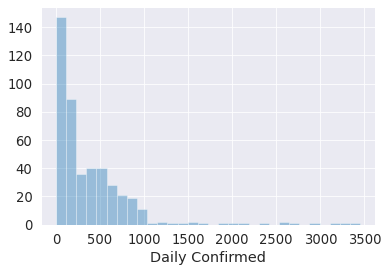

In [49]:
# Let's plot uniariate distributions
sns.distplot(dsi_ts['Daily Confirmed']/100, kde=False, bins=30)

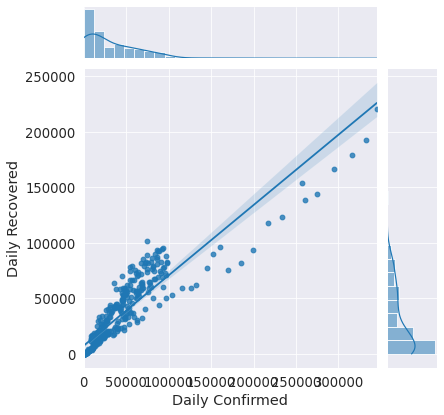

In [50]:
# Let's do a joint plot
sns.jointplot(x='Daily Confirmed', y='Daily Recovered', data=dsi_ts, kind='reg')

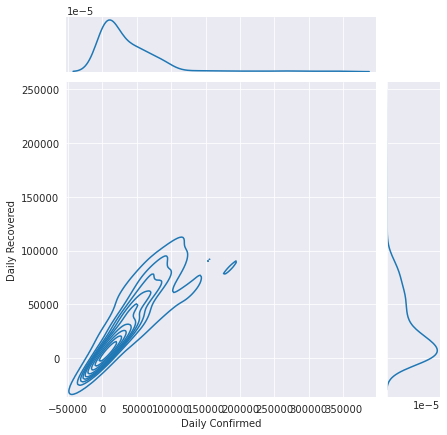

In [43]:
sns.jointplot(x='Daily Confirmed', y='Daily Recovered', data=dsi_ts, kind='kde')

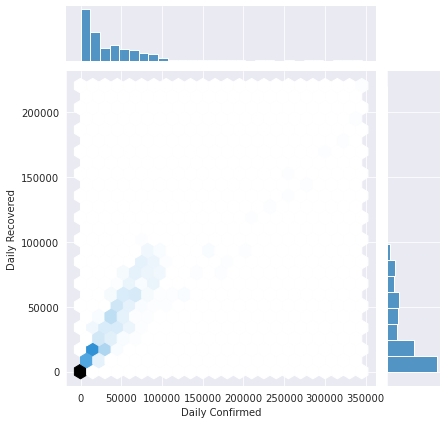

In [44]:
sns.jointplot(x='Daily Confirmed', y='Daily Recovered', data=dsi_ts, kind='hex')

<AxesSubplot:xlabel='Daily Confirmed', ylabel='Density'>

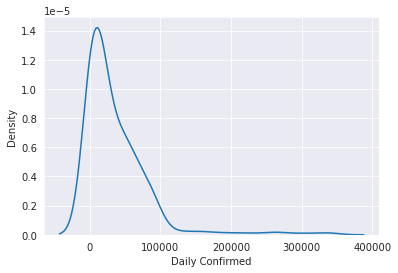

In [45]:
sns.kdeplot(dsi_ts['Daily Confirmed'])

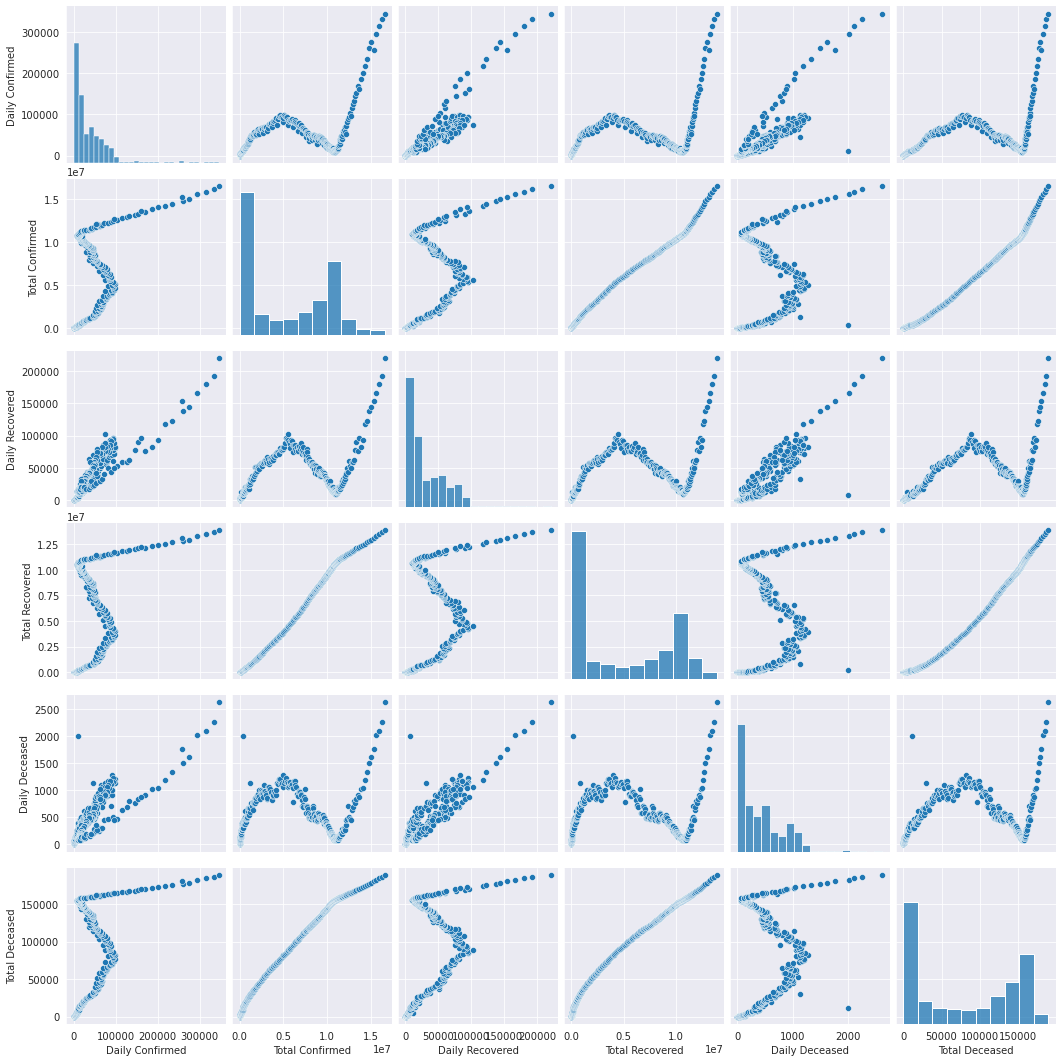

In [46]:
# Let's Pair plot 
sns.pairplot(dsi_ts)

<AxesSubplot:xlabel='Daily Confirmed'>

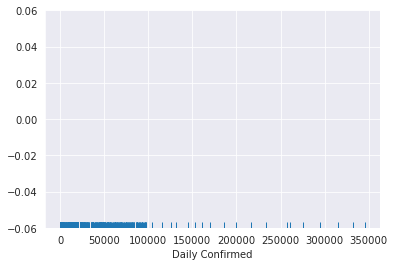

In [47]:
# time for a rug plot
sns.rugplot(dsi_ts['Daily Confirmed'])

In [ ]:
#URLI = "https://api.covid19india.org/data.json"
#result = requests.get(URLI).json()
#dfI = pd.DataFrame(result["cases_time_series"])
#dfI.to_excel("data.xlsx", index=False)

In [ ]:
data_india_1.tail()

In [51]:
URLI = "https://api.covid19india.org/data.json"
resultI = requests.get(URLI).json()
df1 = pd.DataFrame(resultI["cases_time_series"])

In [ ]:
print(df1.keys())

In [ ]:
df1.tail(15)

In [52]:
# setting index as dateymd and dropping date column
df1 = df1.drop(['date'], axis = 1)
df1 = df1.set_index('dateymd')
df1.index.names = [None]

In [53]:
df1.tail(15)

,dailyconfirmed,dailydeceased,dailyrecovered,totalconfirmed,totaldeceased,totalrecovered
2021-04-10,152565,838,90328,13355382,168714,12078167
2021-04-11,169914,904,75380,13525296,169618,12153547
2021-04-12,160838,880,96746,13686134,170498,12250293
2021-04-13,185297,1026,82271,13871431,171524,12332564
2021-04-14,199584,1038,93425,14071015,172562,12425989
2021-04-15,216828,1184,117897,14287843,173746,12543886
2021-04-16,234002,1338,122886,14521845,175084,12666772
2021-04-17,260895,1498,138209,14782740,176582,12804981
2021-04-18,275063,1620,143839,15057803,178202,12948820
2021-04-19,257003,1757,154357,15314806,179959,13103177


In [ ]:
df1.info()

In [ ]:
df1.index = pd.to_datetime(df1.index)
df1["dailyconfirmed"] = df1["dailyconfirmed"].astype(int)/1000
df1["dailydeceased"] = df1["dailydeceased"].astype(int)/1000
df1["dailyrecovered"] = df1["dailyrecovered"].astype(int)/1000
df1["totalconfirmed"] = df1["totalconfirmed"].astype(int)/1000
df1["totaldeceased"] = df1["totaldeceased"].astype(int)/1000
df1["totalrecovered"] = df1["totalrecovered"].astype(int)/1000

In [ ]:
df1.info()

In [ ]:
# some basic plot
df1['dailyconfirmed'].plot()

In [ ]:
df1.plot(subplots=True, figsize=(10,12))

In [ ]:
# comparing daily, weekly (mean) , monthly (mean) 
df_month = df1.resample("M").mean()
df_week = df1.resample("W").mean()

In [ ]:
# daily vs weekly
start, end = '2020-01', '2021-04'
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(df1.loc[start:end, 'dailyconfirmed'], marker='.', linestyle='-', linewidth = 0.1, label='Daily', color='black')
ax.plot(df_week.loc[start:end, 'dailyconfirmed'], marker='.', markersize=2, linestyle='-', label='Weekly', color='coral')
#label='Monthly', color='violet'
ax.set_ylabel("daily confirmed")
ax.legend()

In [ ]:
# 7 day rolling 
df_7d_rolling = df1.rolling(7, center=True).mean()
start, end = '2020-01', '2021-04'
fig, ax = plt.subplots(figsize=(10,10))
#fig =  plt.figure(figsize = (20,8), dpi = 100)
ax.plot(df1.loc[start:end, 'dailyconfirmed'], marker='.', linestyle='-', 
        linewidth=0.1, label='Daily')
ax.plot(df_week.loc[start:end, 'dailyconfirmed'], marker='o', markersize=1, 
        linestyle='-', label = 'Weekly Avg')
ax.plot(df_7d_rolling.loc[start:end, 'dailyconfirmed'], marker='.', markersize=1, linestyle='-', label='7d Rolling Avg')
ax.set_ylabel('daily confirmed')
ax.legend()

In [ ]:
# daily confirmed  vs dailyrecovered
start, end = '2020-01', '2021-04'
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(df1.loc[start:end, 'dailyconfirmed'], marker='o', markersize=3, linestyle='-', linewidth = 0.2, label='confirmed', color='orange')
ax.plot(df1.loc[start:end, 'dailyrecovered'], marker='o', markersize=3, linestyle='-', linewidth = 0.2, label='recovered', color='green')
ax.plot(df1.loc[start:end, 'dailydeceased'], marker='o', markersize=3, linestyle='-', linewidth = 0.2, label='death', color='red')
#label='Monthly', color='violet'
ax.set_ylabel("con vs rec vs dead")
ax.legend()

In [ ]:
# total confirmed  vs dailyrecovered
start, end = '2020-01', '2021-04'
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(df1.loc[start:end, 'totalconfirmed'], marker='.', markersize=3, linestyle='-', linewidth = 0.2, label='confirmed', color='orange')
ax.plot(df1.loc[start:end, 'totalrecovered'], marker='.', markersize=3, linestyle='-', linewidth = 0.2, label='recovered', color='green')
#ax.plot(df1.loc[start:end, 'totaldeceased'], marker='.', markersize=3, linestyle='-', linewidth = 0.2, label='death', color='red')
#label='Monthly', color='violet'
ax.set_ylabel("con vs rec")
ax.legend()

In [ ]:
cat_month = CategoricalDtype(
    ['January', 'February', 'March', 'April', 'May', 'June','July', 'August',  'September','October', 'November', 'December'])

In [ ]:
df['Month'] = df['Month'].astype(cat_month)

# Creating a Ridgeline Plot

In [ ]:
plt.figure()

joyplot(
    data=df[['dailyconfirmed', 'Month']], 
    by='Month',
    figsize=(10, 6)
)
plt.title('Ridgeline Plot of Covid-19 Cases in India for the last 12 months', fontsize=20)
plt.show()

# Ridgeline plot for multiple variables

In [ ]:
plt.figure()

ax, fig = joyplot(
     data=df[['dailyrecovered', 'dailyconfirmed', 'Month']], 
      by='Month',
      figsize=(12, 8),
      column=['dailyrecovered', 'dailyconfirmed'],
      color=['#686de0', '#eb4d4b'],
    legend=True,
    alpha=0.85,
)
plt.title('Ridgeline Plot of Covid-19 Cases and Recoveries in India for the last 3 months', fontsize=20)
plt.show()

#### WORLD

In [ ]:
URLW = "https://opendata.ecdc.europa.eu/covid19/nationalcasedeath_eueea_daily_ei/json/"
resultw = requests.get(URLW).json()
df2 = pd.DataFrame(resultw["records"])

In [ ]:
df2.head()

In [ ]:
df2.info()

In [ ]:
df2.columns

In [ ]:
df2.continentExp.tail()